# 💡 Exploratory Data Analysis for Heart Disease Dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load dataset
df = pd.read_csv("train.csv")

In [24]:
# Basic Info
print("🔹 Shape:", df.shape)
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())

🔹 Shape: (720, 13)

🔹 Data Types:
 PatientID           int64
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

🔹 Missing Values:
 PatientID         0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


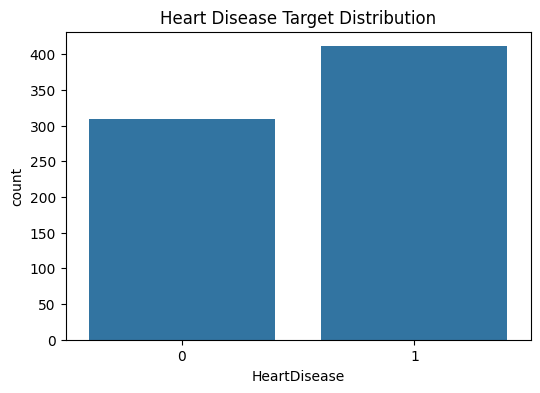


🔹 Target Distribution:
 HeartDisease
1    0.570833
0    0.429167
Name: proportion, dtype: float64


In [25]:
# Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Target Distribution")
plt.show()

print("\n🔹 Target Distribution:\n", df['HeartDisease'].value_counts(normalize=True))

In [26]:
# Numeric Summary
print("\n🔹 Descriptive Statistics:\n", df.describe())


🔹 Descriptive Statistics:
         PatientID         Age   RestingBP  Cholesterol   FastingBS  \
count  720.000000  720.000000  720.000000   720.000000  720.000000   
mean   461.400000   53.920833  132.804167   196.569444    0.240278   
std    263.969033    9.366327   18.476365   109.500805    0.427549   
min      1.000000   28.000000   80.000000     0.000000    0.000000   
25%    236.750000   48.000000  120.000000   170.750000    0.000000   
50%    461.500000   55.000000  130.000000   222.500000    0.000000   
75%    690.250000   60.000000  140.000000   265.250000    0.000000   
max    917.000000   77.000000  200.000000   603.000000    1.000000   

            MaxHR     Oldpeak  HeartDisease  
count  720.000000  720.000000    720.000000  
mean   136.091667    0.920000      0.570833  
std     25.167532    1.081114      0.495301  
min     60.000000   -2.000000      0.000000  
25%    120.000000    0.000000      0.000000  
50%    137.000000    0.600000      1.000000  
75%    154.000000  

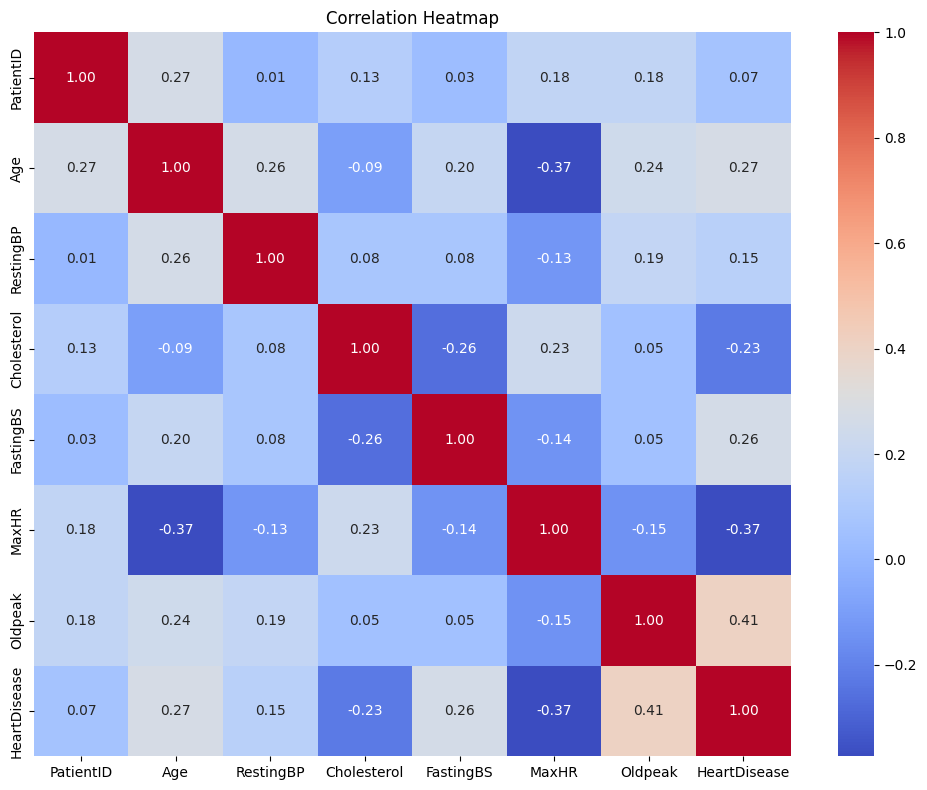

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

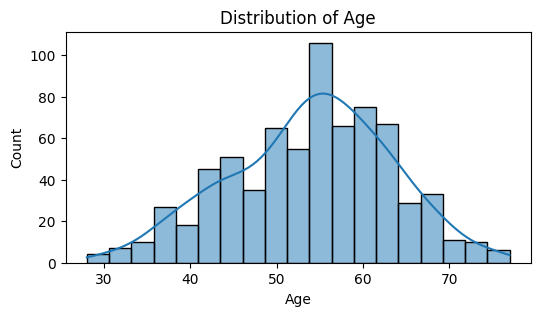

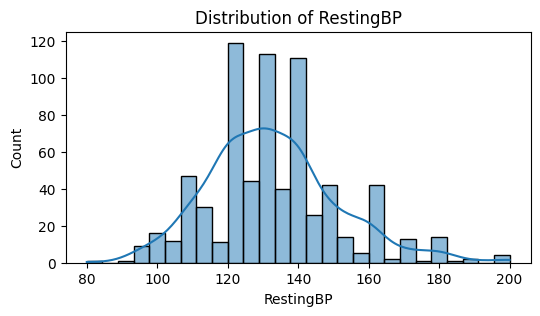

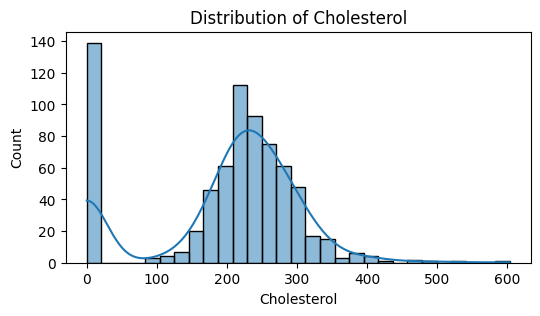

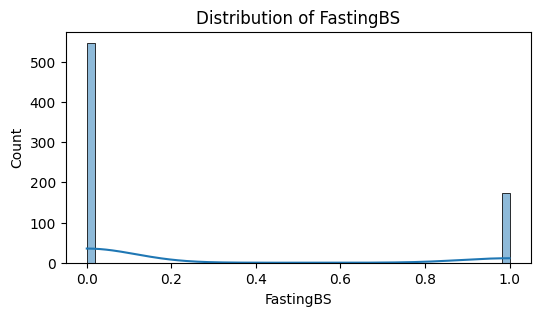

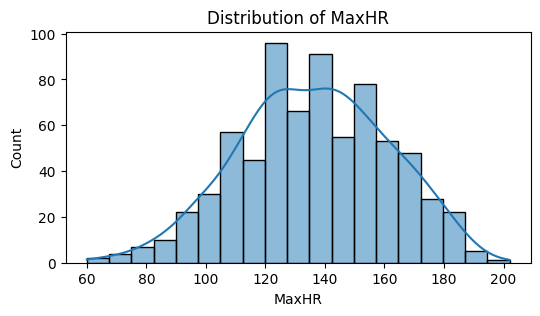

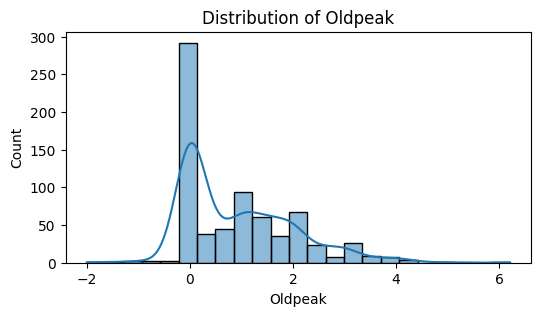

In [28]:
# Feature Distributions (Numerical)
num_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

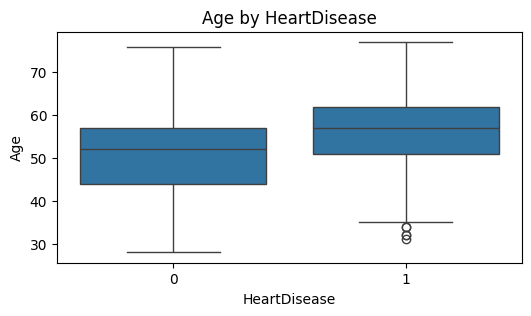

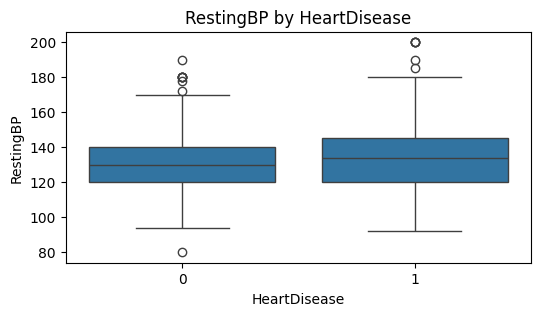

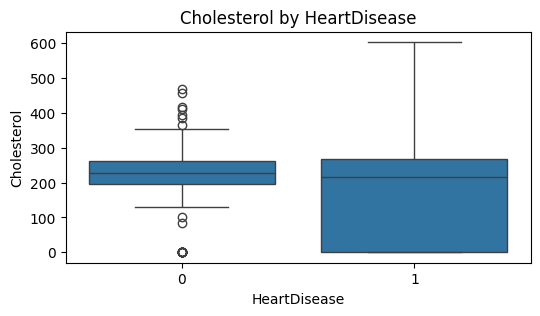

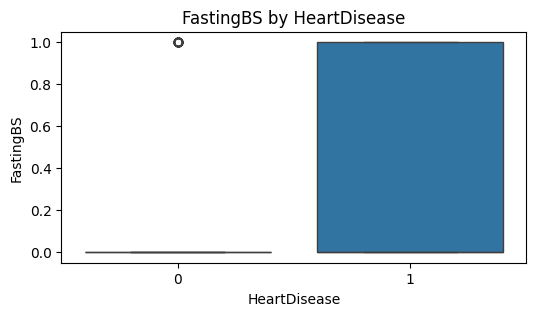

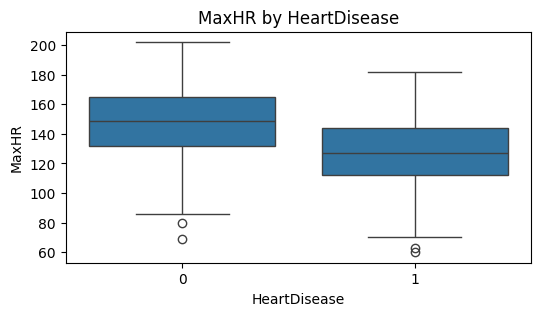

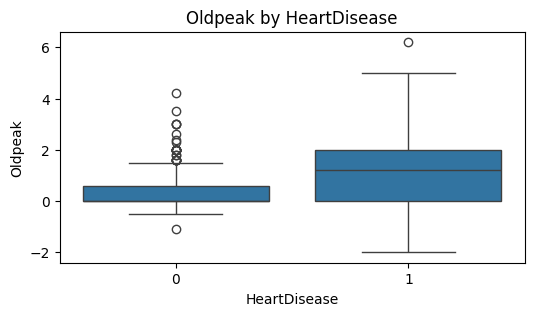

In [29]:
# Boxplots by HeartDisease
for col in num_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='HeartDisease', y=col, data=df)
    plt.title(f'{col} by HeartDisease')
    plt.show()

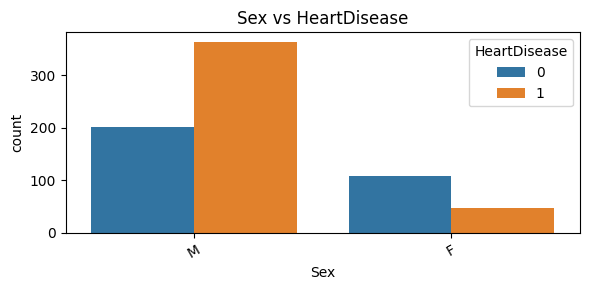

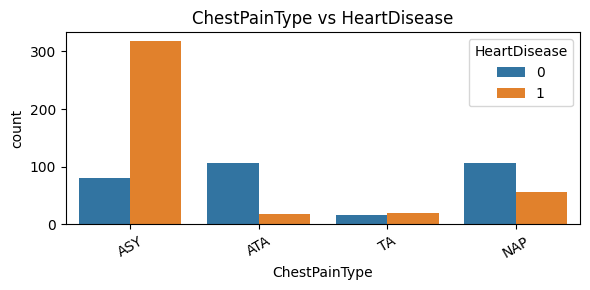

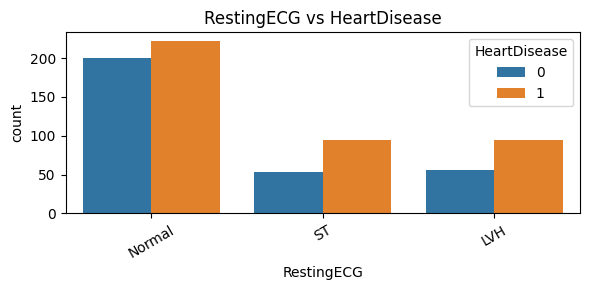

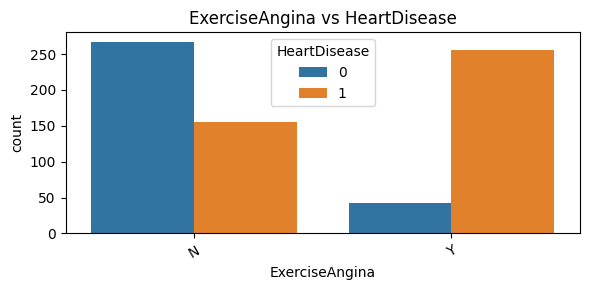

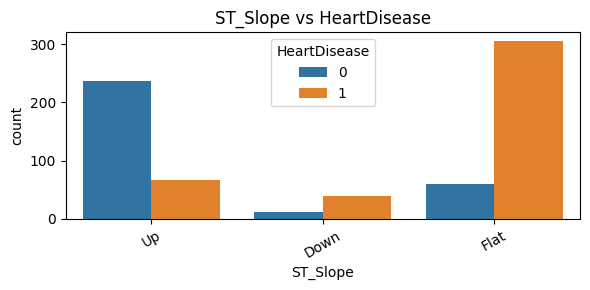

In [30]:
# Categorical Distributions
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, hue='HeartDisease')
    plt.title(f'{col} vs HeartDisease')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

🔎 Abnormal Cholesterol (<= 0): 139 entries


,Age,Sex,Cholesterol,HeartDisease
2,57,M,0,1
13,65,M,0,1
16,68,M,0,1
32,52,M,0,1
36,50,F,0,1
...,...,...,...,...
689,57,M,0,1
698,51,M,0,1
699,57,M,0,1
703,60,M,0,1



🔎 Low RestingBP (< 40): 0 entries
🔎 High RestingBP (> 200): 0 entries

🔎 Negative Oldpeak: 9 entries

🔍 MaxHR > 220 check (biological limit)
Empty DataFrame
Columns: [Age, MaxHR]
Index: []


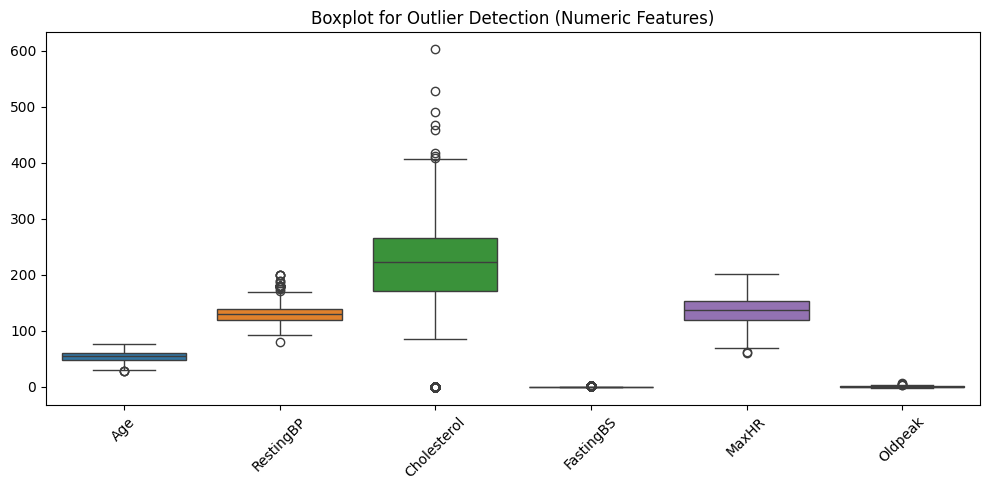

In [31]:
# Detect Irregularities & Anomalies

# Cholesterol: values <= 0 are biologically implausible
invalid_chol = df[df['Cholesterol'] <= 0]
print(f"🔎 Abnormal Cholesterol (<= 0): {len(invalid_chol)} entries")
display(invalid_chol[['Age', 'Sex', 'Cholesterol', 'HeartDisease']])

# RestingBP: too low or too high
bp_low = df[df['RestingBP'] < 40]
bp_high = df[df['RestingBP'] > 200]
print(f"\n🔎 Low RestingBP (< 40): {len(bp_low)} entries")
print(f"🔎 High RestingBP (> 200): {len(bp_high)} entries")

# Oldpeak: should usually be >= 0
neg_oldpeak = df[df['Oldpeak'] < 0]
print(f"\n🔎 Negative Oldpeak: {len(neg_oldpeak)} entries")

# MaxHR: too low for young people, or too high overall
print("\n🔍 MaxHR > 220 check (biological limit)")
print(df[df['MaxHR'] > 220][['Age', 'MaxHR']])

# Optional: visual outlier thresholds using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_features])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection (Numeric Features)")
plt.tight_layout()
plt.show()


## 🧾 EDA Conclusion

The dataset is generally well-structured but exhibits several **data quality issues and insightful patterns**:

- **Target Imbalance**: `HeartDisease` shows a moderate class imbalance, with more positive cases than negative. This warrants careful metric selection (e.g., F1-score) and consideration of resampling techniques.

- **Missing & Invalid Values**: Features like `Cholesterol` and `RestingBP` contain **implausible values (≤ 0)**, which must be addressed through imputation or exclusion. `Oldpeak` and `MaxHR` also include edge-case values that deviate from biological norms.

- **Correlations**: `Oldpeak`, `MaxHR`, and `FastingBS` exhibit moderate correlation with the target. These variables are likely to have predictive power in the final model.

- **Outlier Patterns**: Boxplots and histograms reveal significant **skewness and extreme values**, especially in `Cholesterol` and `RestingBP`. These should be capped or scaled appropriately.

- **Categorical Separability**: Visualizations show clear class separation for features like `ChestPainType`, `ExerciseAngina`, and `ST_Slope`, making them strong candidates for encoding.

### 🧠 Takeaway
The EDA confirms that while the dataset is rich in signal, it requires **robust preprocessing** — including outlier treatment, encoding, and possibly SMOTE — to ensure clean, predictive modeling downstream.
